## SVM Algorithm

In [1]:
import numpy as np
import pandas as pd
import pylab as py
import scipy.optimize as op
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:
data = pd.read_csv("cell_samples.csv")
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


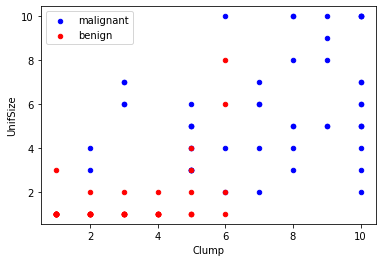

In [8]:
ax = data[data["Class"]==4][0:50].plot(kind="scatter",x="Clump",y="UnifShape",color="blue",label="malignant");
data[data['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='benign',ax=ax);
plt.show()
          

## Data Preprocessing and Visualization

In [9]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [15]:
data = data[pd.to_numeric(data['BareNuc'], errors='coerce').notnull()]
data['BareNuc'] = data['BareNuc'].astype('int')
data.dtypes

<ipython-input-15-39a7a873b07a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BareNuc'] = data['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [17]:
feature_df=data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[      5,       1,       1,       1,       2, 1000025,       3,
              1,       1],
       [      5,       4,       4,       5,       7, 1002945,       3,
              2,       1],
       [      3,       1,       1,       1,       2, 1015425,       3,
              1,       1],
       [      6,       8,       8,       1,       3, 1016277,       3,
              7,       1],
       [      4,       1,       1,       3,       2, 1017023,       3,
              1,       1]], dtype=int64)

In [18]:
data["Class"]=data["Class"].astype("int")
y = np.asarray(data["Class"])
y[0:5]

<ipython-input-18-de1055dc768f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Class"]=data["Class"].astype("int")


array([2, 2, 2, 2, 2])

## Creating Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


## Selecting SVM Model

##### The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function)

In [20]:
from sklearn import svm
clf = svm.SVC(kernel="rbf")
clf.fit(X_train,y_train)

SVC()

## Predicting the Test values

In [21]:
yhat = clf.predict(X_test)
yhat[0:5]

array([2, 2, 2, 2, 2])

## Evaluation

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
import itertools

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[90  0]
 [47  0]]
              precision    recall  f1-score   support

           2       0.66      1.00      0.79        90
           4       0.00      0.00      0.00        47

    accuracy                           0.66       137
   macro avg       0.33      0.50      0.40       137
weighted avg       0.43      0.66      0.52       137

Confusion matrix, without normalization
[[90  0]
 [47  0]]


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


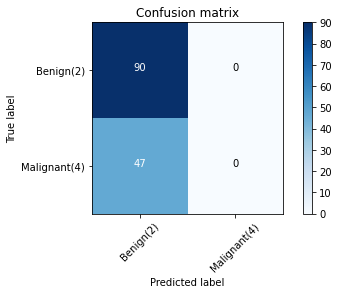

In [26]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)
print(cnf_matrix)
print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [29]:
## We can also use F1 score
from sklearn.metrics import f1_score
f1_score(y_test,yhat,average="weighted")

0.5209170712884659

In [33]:
## Let us try jaccard Index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\__init__.py)